In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [180]:
df = pd.read_csv("data/train.csv")

Exploration

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [182]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [184]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [185]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print(temp1)
print()
print(temp2)

Credit_History
0.0     89
1.0    475
Name: count, dtype: int64

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


<Axes: title={'center': 'Probability of getting loan by credit history'}, xlabel='Credit_History', ylabel='Probability of getting loan'>

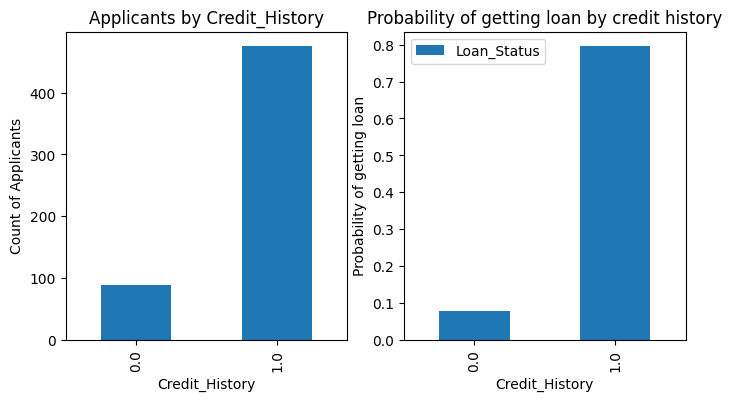

In [186]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind="bar", ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Probability of getting loan")
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind="bar", ax=ax2)

Find missing values

In [187]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [188]:
print(df['Gender'].value_counts())
print()
print(df['Married'].value_counts())
print()
print(df['Dependents'].value_counts())
print()
print(df['Self_Employed'].value_counts())
print()
print(df['Credit_History'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [189]:
# Filling non amount values ...
df.fillna({'Self_Employed': 'No'}, inplace=True)
df.fillna({'Credit_History': 1.0}, inplace=True)
df.fillna({'Dependents': 0}, inplace=True)
df.fillna({'Married': 'Yes'}, inplace=True)
df.fillna({'Gender': 'Male'}, inplace=True)


In [190]:
# convert dependents to numeric ...
df['Dependents'].replace('3+', '3', inplace=True)
df['Dependents'] = df['Dependents'].astype(float).fillna(0.0)

/tmp/ipykernel_28424/2387413876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', '3', inplace=True)


In [191]:
# Label Encodings ...
from sklearn.preprocessing import LabelEncoder
column_names = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for column_name in column_names:
    df[column_name] = le.fit_transform(df[column_name])


In [192]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [193]:
# numericals columns with missing values ...
df.info()
df.iloc[:, 8:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


,LoanAmount,Loan_Amount_Term
0,NaN,360.0
1,128.0,360.0
2,66.0,360.0
3,120.0,360.0
4,141.0,360.0
...,...,...
609,71.0,360.0
610,40.0,180.0
611,253.0,360.0
612,187.0,360.0


In [194]:
# Taking care of missing numerical data ...
# df['Loan_Amount_Term']
# df['LoanAmount']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 8:10])
df.iloc[:, 8:10] = imputer.transform(df.iloc[:, 8:10])

In [195]:
# checking for nan again ...
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [196]:
# Spitting the dataset into Training and Test set ...
# droping first column from feature ...
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7:11] = sc.fit_transform(X_train[:, 7:11])
X_test[:, 7:11] = sc.transform(X_test[:, 7:11])

In [198]:
print(y_train)

[0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1]


In [199]:
def performance(model, X_test, y_test):
     # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    return accuracy_score(y_test, y_pred)

In [200]:
 # Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=10, criterion='entropy', random_state=0, max_depth=7, max_features=1)
classifier.fit(X_train, y_train)

performance(classifier, X_test, y_test)

[[17 22]
 [ 2 82]]


0.8048780487804879

In [201]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

performance(classifier, X_test, y_test)

[[18 21]
 [ 3 81]]


0.8048780487804879

In [202]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

performance(classifier, X_test, y_test)

[[ 0 39]
 [ 1 83]]


0.6747967479674797

In [203]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

performance(classifier, X_test, y_test)

[[22 17]
 [23 61]]


0.6747967479674797

In [204]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

performance(classifier, X_test, y_test)

[[ 6 33]
 [16 68]]


0.6016260162601627